# Data exploration of the FIFA dataset

This notebook will show the process of data exploration of the FIFA dataset, exploring the data will consist of:
- data cleaning,
- data analysis,
- statistical tests,
- visualizations.

Data exploration is a crucial step in data-driven applications as it is crucial for the researcher to not only have accurate data,
but also to understand the context in which the data sits. Without it, the risk of choosing poor statistical tests for the data
is increased. Moreover, proper understanding of the data and the requirements needed to perform any sort of predictive tasks
(classification, regression, clustering) can increase the development efficiency and decrease both time and costs needed.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First, we load the dataset and look at it in its raw format.

In [19]:
raw_data = pd.read_csv("data/FIFA22_official_data.csv")
raw_data

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,€259K,7.0


Instantly we can remove all columns containing lists to files, such as Photo, Flag, Club Logo. Moreover, I think it will
be appropriate to remove all carer related data. (THIS NEEDS CHANGING)

In [20]:
data = raw_data.drop(["Photo", "Flag", "Club Logo", "Special", "International Reputation", "Body Type", "Real Face", "Joined", "Loaned From",
                      "Contract Valid Until", "Release Clause", "Best Position", "Best Overall Rating", "Potential"], axis=1, inplace=False)
data

,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness
0,212198,Bruno Fernandes,26,Portugal,88,Manchester United,€107.5M,€250K,Right,3.0,...,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,72.0
1,209658,L. Goretzka,26,Germany,87,FC Bayern München,€93M,€140K,Right,4.0,...,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,74.0
2,176580,L. Suárez,34,Uruguay,88,Atlético de Madrid,€44.5M,€135K,Right,4.0,...,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,42.0
3,192985,K. De Bruyne,30,Belgium,91,Manchester City,€125.5M,€350K,Right,5.0,...,89.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,68.0
4,224334,M. Acuña,29,Argentina,84,Sevilla FC,€37M,€45K,Left,3.0,...,87.0,NaN,84.0,82.0,8.0,14.0,13.0,13.0,14.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,England,53,Cheltenham Town,€100K,€1K,Right,2.0,...,37.0,5.0,11.0,12.0,55.0,54.0,52.0,50.0,59.0,NaN
16706,262846,�. Dobre,20,Romania,53,FC Academica Clinceni,€180K,€550,Right,2.0,...,29.0,NaN,13.0,12.0,57.0,52.0,53.0,48.0,58.0,5.0
16707,241317,21 Xue Qinghao,19,China PR,47,Shanghai Shenhua FC,€100K,€700,Right,2.0,...,17.0,NaN,11.0,9.0,49.0,48.0,45.0,38.0,52.0,21.0
16708,259646,A. Shaikh,18,India,47,ATK Mohun Bagan FC,€110K,€500,Right,3.0,...,23.0,NaN,14.0,13.0,49.0,41.0,39.0,45.0,49.0,7.0


Let us start by plotting the distribution of players' age with the average age displayed on the plot.

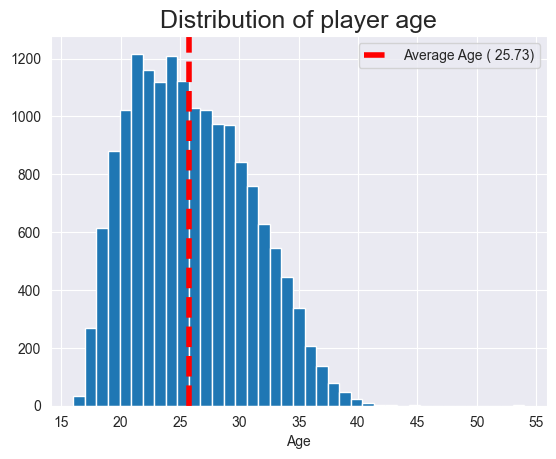

In [21]:
plt.hist(data["Age"], bins=39)
average_age = data["Age"].mean()
plt.axvline(x=average_age, color="red", linestyle="--", linewidth=4, label=f"Average Age ({average_age: .2f})")
plt.xlabel("Age")
plt.legend()
plt.title("Distribution of player age", fontsize=18)
plt.show();

We find that the average age is equal to 25.73 years with the distribution being uneven on both sides. Younger ages have lower range with
more density, while the older ages have wider range with lower density.

We also find that there are some players who are over 40 years old. While 40 is not old, by football standards it is rather unusual
to see someone this age still playing professionally.

Let us explore who these players are.

In [22]:
oldest_ten_players = data.sort_values(by="Age", ascending=False).head(10)
print("The 10 oldest players are:")
for index, row in oldest_ten_players.iterrows():
    print(f"{row['Name']} - {row['Age']}")

oldest_ten_players

The 10 oldest players are:
K. Miura - 54
19 O. Pérez - 45
S. Nakamura - 43
C. Lucchetti - 43
G. Buffon - 43
08 M. Ballotta - 43
21 Hilton - 42
16 C. Blanco - 42
K. Ellison - 42
21 Lee Dong Gook - 41


,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness
14735,254704,K. Miura,54,Japan,59,Yokohama FC,€0,€700,Right,4.0,...,78.0,NaN,13.0,13.0,6.0,14.0,8.0,6.0,7.0,16.0
15242,140029,19 O. Pérez,45,Mexico,71,Pachuca,€160K,€8K,Right,3.0,...,62.0,23.0,12.0,11.0,70.0,64.0,65.0,73.0,74.0,NaN
10050,29552,S. Nakamura,43,Japan,63,Yokohama FC,€0,€800,Left,3.0,...,78.0,NaN,38.0,34.0,8.0,6.0,7.0,15.0,6.0,40.0
14932,156483,C. Lucchetti,43,Argentina,72,Atlético Tucumán,€250K,€4K,Right,3.0,...,41.0,NaN,22.0,13.0,73.0,70.0,77.0,69.0,70.0,21.0
15182,1179,G. Buffon,43,Italy,80,Parma,€2.3M,€18K,Right,2.0,...,70.0,NaN,11.0,11.0,76.0,73.0,70.0,90.0,76.0,13.0
16155,4703,08 M. Ballotta,43,Italy,65,Lazio,€0,€0,Right,3.0,...,NaN,28.0,34.0,NaN,65.0,69.0,77.0,73.0,68.0,NaN
4913,153260,21 Hilton,42,Brazil,75,Montpellier Hérault SC,€0,€18K,Right,4.0,...,77.0,NaN,78.0,74.0,12.0,7.0,11.0,12.0,13.0,78.0
6717,135708,16 C. Blanco,42,Mexico,71,Club América,€0,€20K,Right,5.0,...,NaN,18.0,32.0,38.0,6.0,12.0,12.0,16.0,9.0,NaN
9090,2702,K. Ellison,42,England,58,Newport County,€0,€2K,Left,3.0,...,68.0,NaN,36.0,34.0,7.0,11.0,6.0,14.0,6.0,41.0
9263,136553,21 Lee Dong Gook,41,Korea Republic,69,Jeonbuk Hyundai Motors,€0,€5K,Right,4.0,...,73.0,NaN,15.0,16.0,11.0,6.0,12.0,10.0,9.0,30.0


Here we find the 10 oldest active players. In the dataset we find some anomalies with their names, let us clear them and
display the names clearly next along with the age of the player.

In [23]:
data["Name"] = data["Name"].str.replace(r'\d+', '', regex=True)
data["Name"] = data["Name"].str.lstrip()

oldest_ten_players = data.sort_values(by="Age", ascending=False).head(10)
print("The 10 oldest players are:")
for index, row in oldest_ten_players.iterrows():
    print(f"{row['Name']} - {row['Age']}")

The 10 oldest players are:
K. Miura - 54
O. Pérez - 45
S. Nakamura - 43
C. Lucchetti - 43
G. Buffon - 43
M. Ballotta - 43
Hilton - 42
C. Blanco - 42
K. Ellison - 42
Lee Dong Gook - 41


Surprisingly, we find one player above 50, truly an achievement to still play professionally at this age.

Now we will explore players' Overall rating distribution across ages. For this, we will exclude goalkeepers as they are scored
across a different set of statistics compared to the rest of the players.

In [24]:
data.drop(data[data["Position"] == "GK"].index, inplace=True)
data = data.drop(["GKDiving", "GKHandling", "GKKicking", "GKPositioning", "GKReflexes"], axis=1, inplace=False)

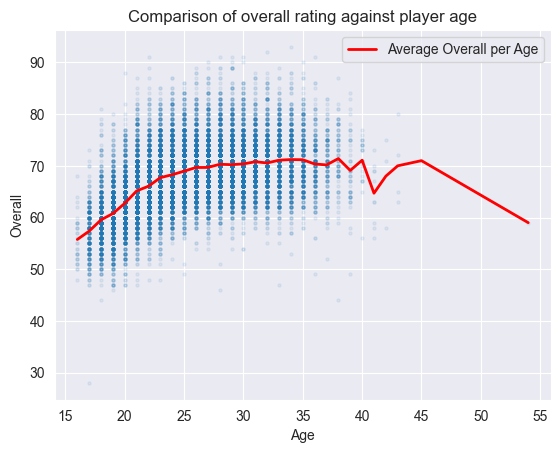

In [25]:
age_rating_avg = data.groupby("Age")["Overall"].mean().reset_index()
plt.scatter(data["Age"], data["Overall"], s=5, alpha=0.08)
plt.plot(age_rating_avg['Age'], age_rating_avg['Overall'], color='red', linewidth=2, label='Average Overall per Age')
plt.xlabel("Age")
plt.ylabel("Overall")
plt.title("Comparison of overall rating against player age")
plt.legend()
plt.show();

Plotting the Overall rating distribution across ages shows us that, on average, best ages for the players are between roughly 30 and 35.
Interestingly, for most of the ages the average Overall rating falls in the Silver card category (Overall in the range of 65-74), even-thought
this card colour is the least popular across all three (Bronze 0-64, Silver 65-74, Gold 75-100).

This happens as Bronze and Gold cards, which exist roughly in equal amounts, "cancel" each other out.

Let us now explore two assumptions that can be generally observed within the sport:
- "The better a player is at his worse foot, the better he is at shooting",
- "The better a player is at dribbling, the flashier his moves are".

For this, we will compare statistics Weak Foot-Finishing, and, Skill Moves-Dribbling with the use of ANOVA statistical test. 

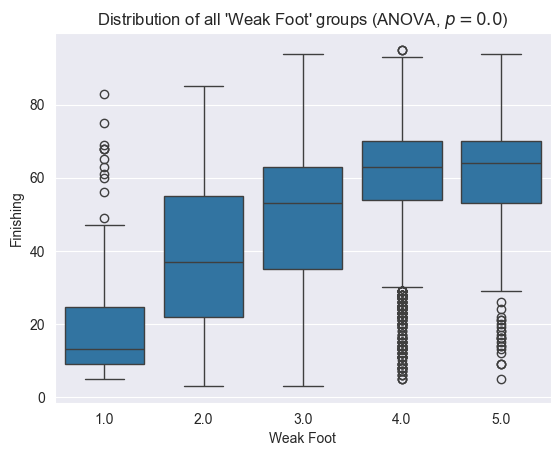

In [26]:
from scipy import stats

sns.boxplot(x="Weak Foot", y="Finishing", data=data)
plt.xlabel("Weak Foot")
plt.ylabel("Finishing")

groups = data["Weak Foot"].unique()
grouped_data = [data[data["Weak Foot"] == group]["Finishing"] for group in groups]
F, p = stats.kruskal(*grouped_data)

plt.title(f"Distribution of all 'Weak Foot' groups (ANOVA, $p = {p}$)")
plt.show();

Doing as ANOVA we find that groups represented by their Weak Foot rating are in fact not equal and are statistically different from each other.
It is important to note that while the p-value shows here =0.00, this outcome is very unlikely, and it is most likely due to the fact
that the p-value was so small that noting but zeros could be stored in the variable itself, resulting to this round up.

For future reference, if the p-value is presented as =0.00, this means that the p-value is at least tiny, and most likely not exactly 0.

We can expand the test to the pairwise TukeyHSD statistical test which will compare each and every group separately with each other,
this enables us to know which groups are statistically different from each other, instead of knowing if any group is statistically different.

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

pairwise_comparison = pairwise_tukeyhsd(data["Finishing"], data["Weak Foot"])
print(pairwise_comparison)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   1.0    2.0  17.3909   0.0 12.3609 22.4208   True
   1.0    3.0  27.9863   0.0 23.0084 32.9642   True
   1.0    4.0  39.1645   0.0 34.1268 44.2023   True
   1.0    5.0  38.8348   0.0 33.1619 44.5076   True
   2.0    3.0  10.5954   0.0  9.5966 11.5942   True
   2.0    4.0  21.7736   0.0 20.5098 23.0375   True
   2.0    5.0  21.4439   0.0 18.5457  24.342   True
   3.0    4.0  11.1782   0.0 10.1407 12.2157   True
   3.0    5.0  10.8485   0.0  8.0416 13.6553   True
   4.0    5.0  -0.3298 0.998 -3.2415   2.582  False
---------------------------------------------------


Here we find that all but groups Weak Foot 4-5 are statistically different from each other, suggesting that the assumption from the beginning
hold true in all but this case.

We will now repeat this process for the Skill Moves-Dribbling comparison.

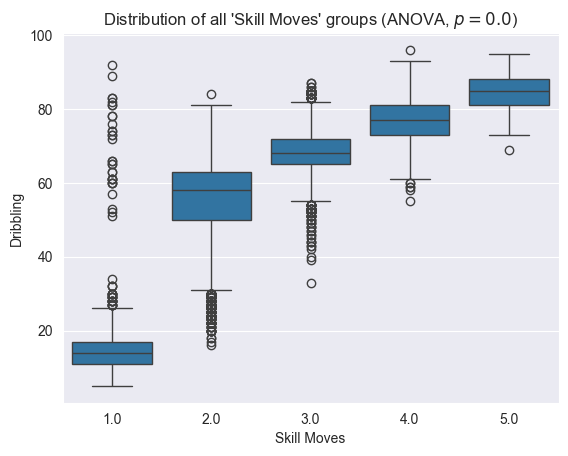

In [28]:
sns.boxplot(x="Skill Moves", y="Dribbling", data=data)
plt.xlabel("Skill Moves")
plt.ylabel("Dribbling")

groups = data["Skill Moves"].unique()
grouped_data = [data[data["Skill Moves"] == group]["Dribbling"] for group in groups]
_, p = stats.kruskal(*grouped_data)

plt.title(f"Distribution of all 'Skill Moves' groups (ANOVA, $p = {p}$)")
plt.show();

We again find a very small p-value which confirms the assumption.

In [29]:
pairwise_comparison = pairwise_tukeyhsd(data["Dribbling"], data["Skill Moves"])
print(pairwise_comparison)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   1.0    2.0  40.2361   0.0 39.5986 40.8736   True
   1.0    3.0  53.3428   0.0 52.7007 53.9849   True
   1.0    4.0  61.4347   0.0  60.589 62.2805   True
   1.0    5.0   68.918   0.0 66.0164 71.8195   True
   2.0    3.0  13.1067   0.0 12.7146 13.4989   True
   2.0    4.0  21.1986   0.0 20.5227 21.8745   True
   2.0    5.0  28.6819   0.0 25.8252 31.5385   True
   3.0    4.0   8.0919   0.0  7.4117  8.7721   True
   3.0    5.0  15.5751   0.0 12.7174 18.4328   True
   4.0    5.0   7.4832   0.0   4.573 10.3935   True
---------------------------------------------------


Moreover, pairwise TukeyHSD test shows that this assumption hold true for all cases.

As the next set of statistics is fully continuous (to the contrast of the continuous statistic being split by a categorical variable before)
we can not use the same test to establish any type of relationship between the variables.

For two continuous statistics we will use regression to obtain a correlation (R value) which will indicate the level of impact of 
one statistic on the other. The range of the R value is set between 1 and -1, 1 meaning perfect positive correlation, 0 meaning no correlation,
and -1 meaning perfect negative correlation.

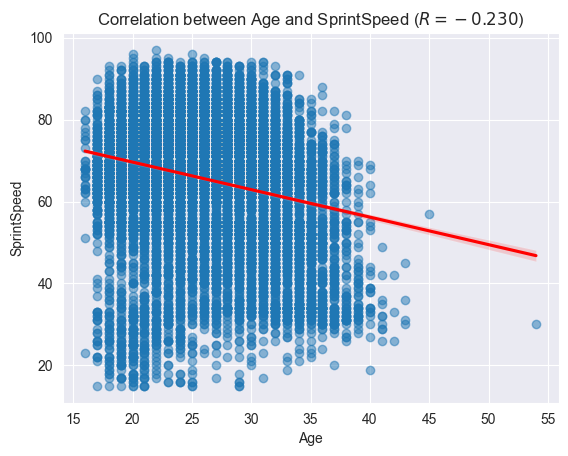

In [30]:
sns.regplot(x="Age", y="SprintSpeed", data=data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
test = stats.pearsonr(data["SprintSpeed"], data["Age"])
plt.title(f"Correlation between Age and SprintSpeed ($R = {test.statistic:.3f}$)")
plt.show();

This way we obtain the R statistic of -0.23 between Age and SprintSpeed, meaning that as age increases, the sprint speed tends
to slightly decrease. Arguably this correlation is quite small, meaning there are most likely other, more significant factors than age.

We will do the same to Age-Acceleration relation.

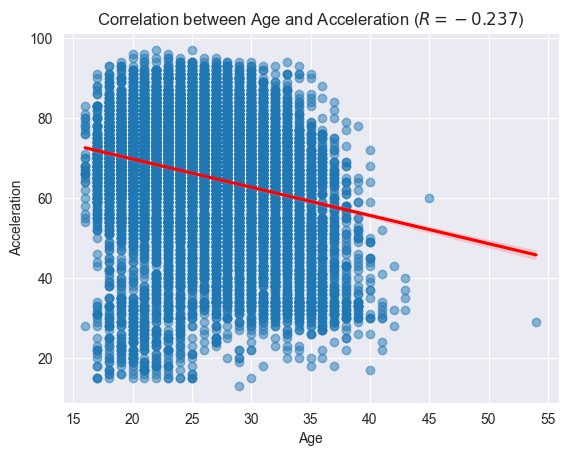

In [31]:
sns.regplot(x="Age", y="Acceleration", data=data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
test = stats.pearsonr(data["Age"], data["Acceleration"])
plt.title(f"Correlation between Age and Acceleration ($R = {test.statistic:.3f}$)")
plt.show();

Here we obtain almost identical correlation, meaning the conclusions are the same.

Out of curiosity, we will now compare SprintSpeed and Acceleration as they yield identical resutls in relation to age.

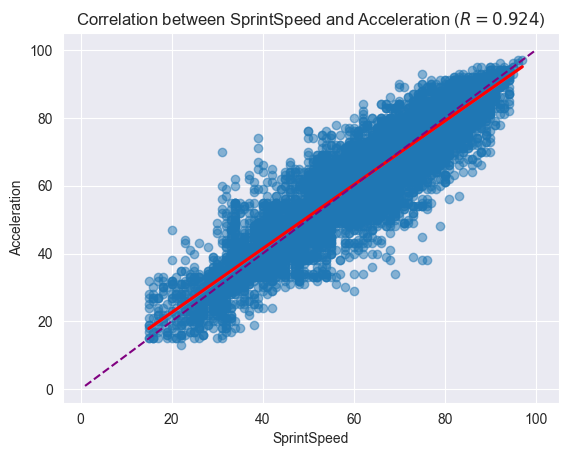

In [32]:
sns.regplot(x="SprintSpeed", y="Acceleration", data=data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.plot(np.linspace(1, 100, 100), np.linspace(1, 100, 100), color="purple", linestyle="dashed")

test = stats.pearsonr(data["SprintSpeed"], data["Acceleration"])
plt.title(f"Correlation between SprintSpeed and Acceleration ($R = {test.statistic:.3f}$)")
plt.show();

Here (even-though the spread of the data is quite wide) we find a very strong positive correlation of 0.924 meaning that almost 
all the acceleration statistic can be predicted or explained by the SprintSpeed statistic.
To compare this correlation to the correlation of 1, there is a dashed pink line drawn on the plot showing how said correlation would look.

With big datasets this process of finding correlations for each combination can get quite lengthy, so we will lose some detail by
plotting a heatmap of all correlation. This will result in us not being able to see how the data is distributed, but will
provide very dense and compact way of finding correlation values between any pair of variables.

To do this first we need to ensure that there are no irrelevant variables in the dataset that are not player statistics
(or categorical player statistics such as Weak Foot or Skill Moves).

In [33]:
stats_no_label = data.drop(["ID", "Name", "Nationality", "Overall", "Club", "Value", "Wage", "Preferred Foot", "Weak Foot", "Skill Moves",
                            "Work Rate", "Jersey Number", "Height", "Weight", "Position", "Age", "Marking"], axis=1, inplace=False)
stats_no_label

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,DefensiveAwareness
0,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,...,89.0,78.0,66.0,87.0,90.0,91.0,87.0,73.0,65.0,72.0
1,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,...,86.0,81.0,86.0,85.0,84.0,60.0,82.0,85.0,77.0,74.0
2,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,...,88.0,87.0,41.0,91.0,84.0,83.0,87.0,45.0,38.0,42.0
3,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,...,91.0,76.0,66.0,88.0,94.0,83.0,89.0,65.0,53.0,68.0
4,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,...,81.0,84.0,79.0,81.0,82.0,76.0,87.0,84.0,82.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,12.0,5.0,13.0,18.0,7.0,12.0,11.0,13.0,19.0,10.0,...,6.0,16.0,9.0,5.0,29.0,18.0,37.0,11.0,12.0,NaN
16706,13.0,7.0,10.0,17.0,7.0,6.0,11.0,13.0,28.0,17.0,...,6.0,18.0,13.0,8.0,33.0,12.0,29.0,13.0,12.0,5.0
16707,12.0,9.0,14.0,15.0,6.0,8.0,12.0,13.0,14.0,12.0,...,8.0,13.0,11.0,7.0,18.0,15.0,17.0,11.0,9.0,21.0
16708,13.0,8.0,10.0,22.0,8.0,10.0,11.0,13.0,18.0,13.0,...,5.0,24.0,6.0,6.0,31.0,19.0,23.0,14.0,13.0,7.0


Now we make the correlation matrix.

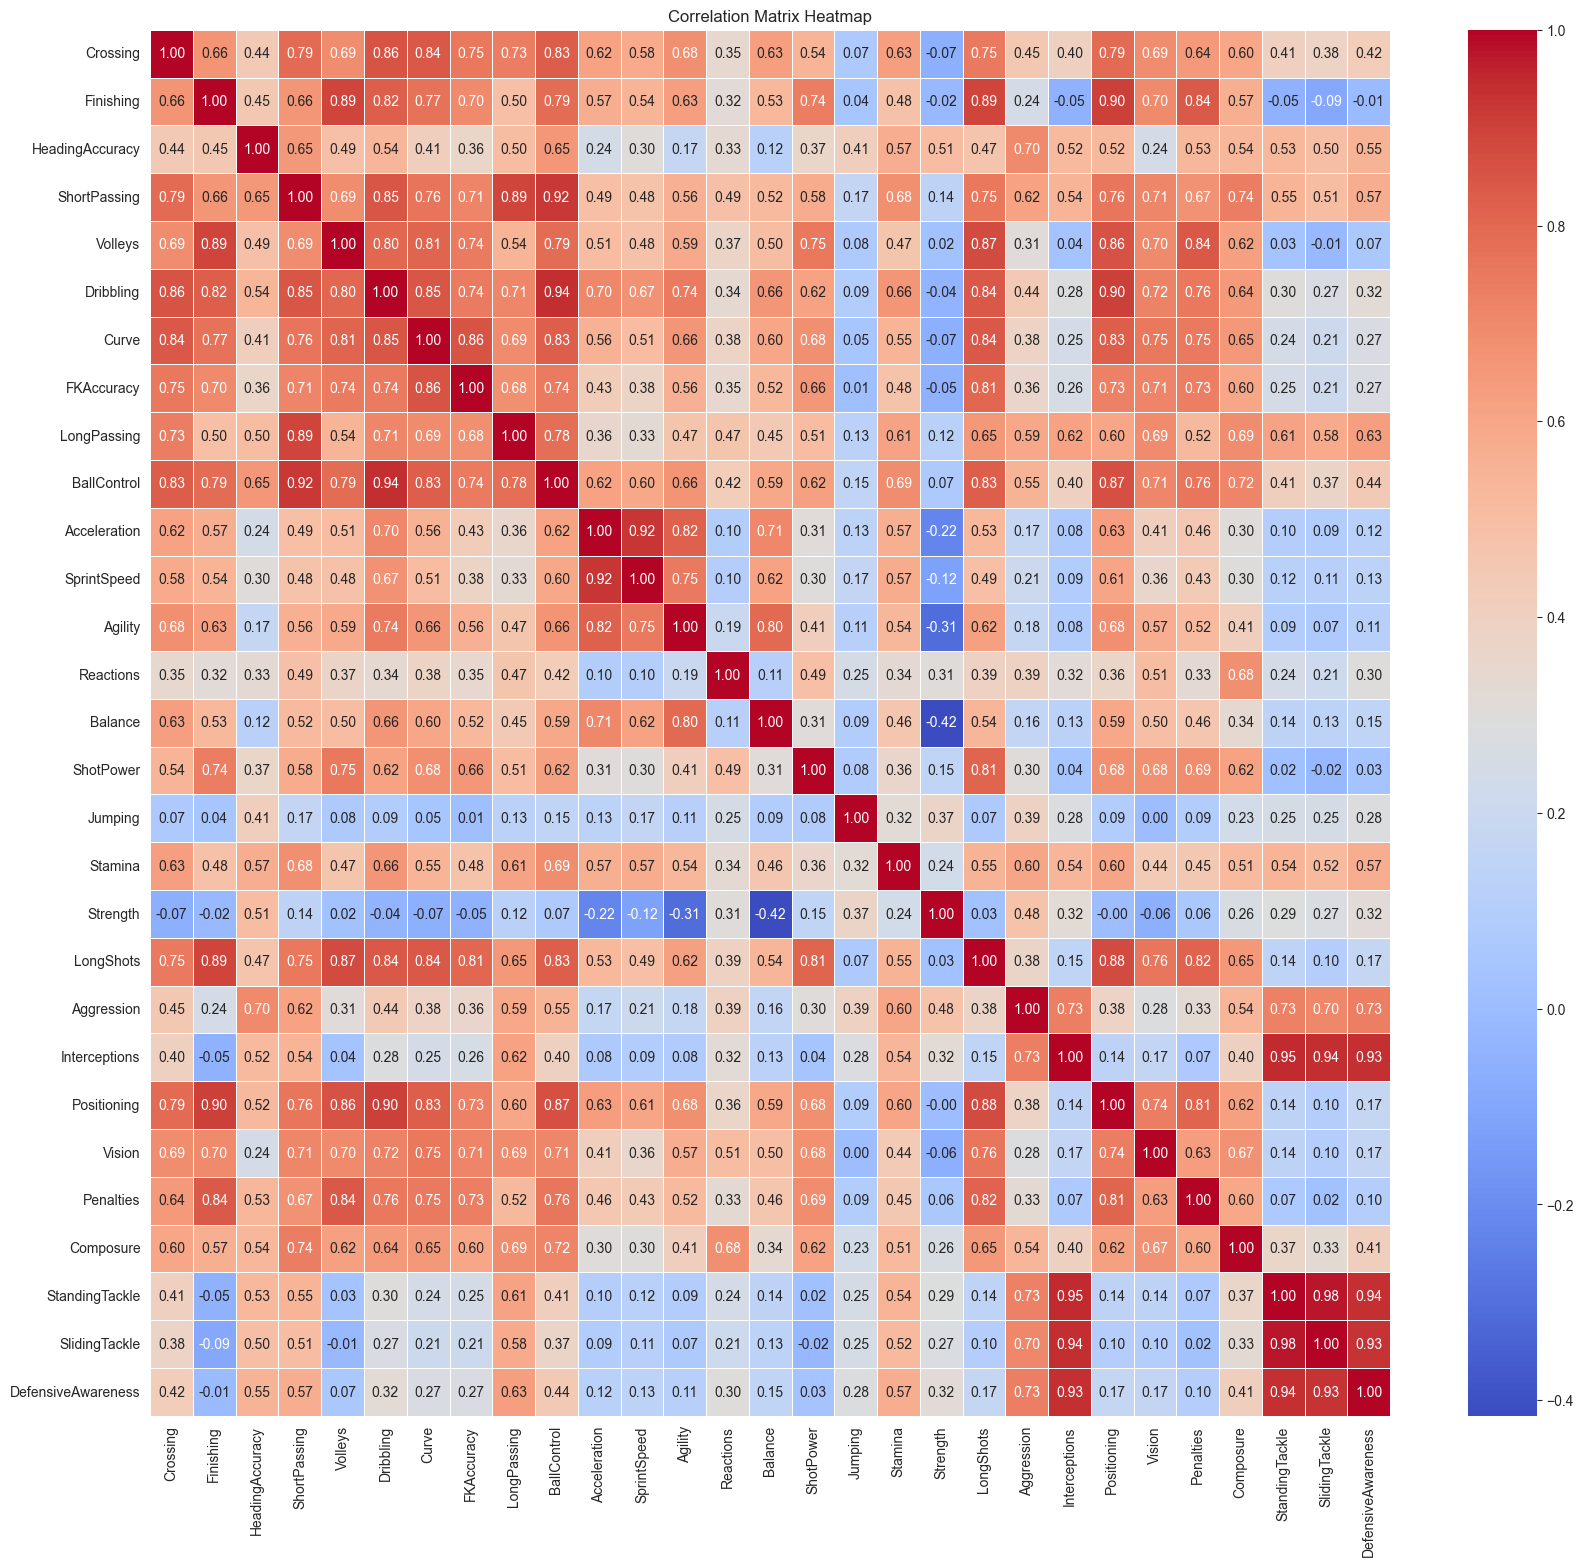

In [34]:
correlation_matrix = stats_no_label.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show();